# 1.什么是支持向量机（SVM）
### 1）问题描述：如下图所示在一个$XOY$平面上，有很多的数据点，它们有些属于A类别（用红色叉表示），有些属于B类别（用蓝色叉表示），$x_1$表示这些数据其中的一个特征；$x_2$表示这些数据的另一个特征。如想要把足球当做类别A，把篮球当做类别B（与下图无关）。假设他们的衡量特征$x_1$为球的半径（或者表面积体积等）和$x_2$为球表面的线条数量，对于现有数据做出统计，当$(x_1,x_2)$为某个点的时候，分类为A，$(x_1,x_2)$为另一个点的时候又分类为B。现在将类别为A用数字$1$代表；将类别为B用数字$-1$代表，那么第$i$个数据（现假设有$m$个数据）的类别为$y^{(i)}$，$y^{(i)}=\left\{1,-1\right\}$（$i=1,2,3,...,m$），特征向量可以表示为：$\vec{x^{(i)}}=(x_1^{(i)},x_2^{(i)})$，如果有$n$个特征，向量是$n$维的，现在现讨论$2$维的。

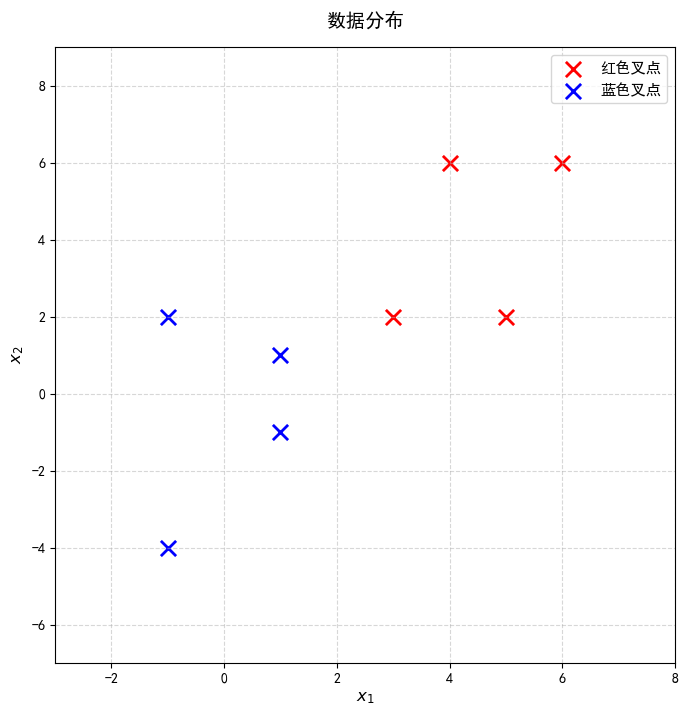

In [2]:
import matplotlib.pyplot as plt

# 字体配置（解决中文和负号显示问题）
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 创建图形
plt.figure(figsize=(8, 8))

# 定义点坐标
red_points = [(4, 6), (5, 2), (3, 2), (6, 6)]
blue_points = [(1, 1), (-1, -4), (-1, 2), (1, -1)]

# 绘制红色叉点
for x, y in red_points:
    plt.scatter(x, y, color='red', marker='x', s=120, linewidth=2, label='红色叉点' if (x, y) == red_points[0] else "")

# 绘制蓝色叉点
for x, y in blue_points:
    plt.scatter(x, y, color='blue', marker='x', s=120, linewidth=2, label='蓝色叉点' if (x, y) == blue_points[0] else "")

# 图表设置
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.title('数据分布', fontsize=14, pad=15)
plt.legend(fontsize=11)  # 显示点的类型说明
plt.grid(True, linestyle='--', alpha=0.5)  # 网格线辅助观察

# 调整坐标轴范围（确保所有点完整显示）
plt.xlim(-3, 8)
plt.ylim(-7, 9)

# 显示图形
plt.show()

### 2）SVM的工作：SVM的工作是寻找一条直线或平面或者超平面可以分离这两类数据（对于只有两个特征，使用直线；对于三个特征，使用三维空间平面；对于$n(n>3)$个特征，使用超平面）将其设为：$(\vec\omega)^T\vec x+b=0$（在$n$个特征的情况下，$\vec x=(x_1,x_2,x_3,...,x_n)^T$，$\vec\omega=(\omega_1,\omega_2,\omega_3,...,\omega_n)^T$对应的$\vec x$，$b$是常数）。考虑两种特征，如下图，有红色实线和黑色实线分隔两个类，显然黑色实线更好地分隔两个类，因为对于黑色线，离得最近的两个类的数据，分别是$(6,6)$和$(3,2)$，他们之间的间隔，比红色线离得最近的两个类的数据$(4,6)$和$(1,-1)$之间的间隔大，如图黄色和橙色虚线。红色和黑色的直线方程分别是：$(\vec\omega_{红})^T\vec x+b_{红}=0$和$(\vec\omega_{黑})^T\vec x+b_{黑}=0$，那么他们的黄橙两线分别是：$(\vec\omega_{红})^T\vec x+b_{红}=-1$，$(\vec\omega_{红})^T\vec x+b_{红}=1$和$(\vec\omega_{黑})^T\vec x+b_{黑}=-1$，$(\vec\omega_{黑})^T\vec x+b_{黑}=1$，把黄橙两线称为分隔线的硬间隔。所以归纳可得SVM的工作是寻找一条硬间隔最大的直线分隔两类数据。

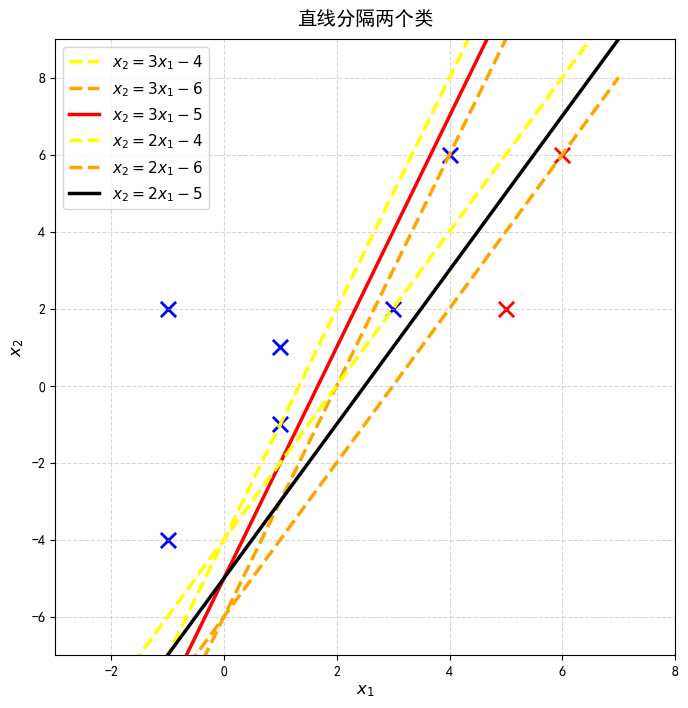

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 优化字体配置：优先使用支持特殊符号的中文字体
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 创建图形
plt.figure(figsize=(8, 8))

# 定义点的坐标
red_points = [(6, 6), (5, 2)]
blue_points = [(1, 1), (-1, -4), (-1, 2), (1, -1), (4, 6), (3, 2)]

# 绘制红色叉点（放大尺寸更清晰）
for x, y in red_points:
    plt.scatter(x, y, color='red', marker='x', s=120, linewidth=2)

# 绘制蓝色叉点
for x, y in blue_points:
    plt.scatter(x, y, color='blue', marker='x', s=120, linewidth=2)

# 生成x值范围（覆盖所有点的x坐标）
x = np.linspace(-2, 7, 100)

# 绘制三条直线（加粗线条更醒目）
plt.plot(x, 3*x - 4, color='yellow', linestyle='--', linewidth=2.5, label=r'$x_2=3x_1-4$')
plt.plot(x, 3*x - 6, color='orange', linestyle='--', linewidth=2.5, label=r'$x_2=3x_1-6$')
plt.plot(x, 3*x - 5, color='red', linestyle='-', linewidth=2.5, label=r'$x_2=3x_1-5$')
plt.plot(x, 2*x - 4, color='yellow', linestyle='--', linewidth=2.5, label=r'$x_2=2x_1-4$')
plt.plot(x, 2*x - 6, color='orange', linestyle='--', linewidth=2.5, label=r'$x_2=2x_1-6$')
plt.plot(x, 2*x - 5, color='black', linestyle='-', linewidth=2.5, label=r'$x_2=2x_1-5$')

# 图表美化
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.title('直线分隔两个类', fontsize=14, pad=10)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# 调整坐标轴范围，让元素分布更合理
plt.xlim(-3, 8)
plt.ylim(-7, 9)

# 显示图形
plt.show()

### 3）SVM的定义：在特征空间中找到最优分离超平面，最大化不同类别样本间的分类间隔（把直线，三维平面，多维线性方程统称为超平面）。

# 2.解决SVM
### 1）SVM的数学问题转化：对于$m$个数据$\left\{\vec{x^{(1)}},y^{(1)}\right\},\left\{\vec{x^{(2)}},y^{(2)}\right\},\left\{\vec{x^{(3)}},y^{(3)}\right\},...,\left\{\vec{x^{(m)}},y^{(m)}\right\}$中，$y^{(i)}=\left\{1,-1\right\}$（$i=1,2,3,...,m$）如果分类在黑色线的上方且在黄色硬间隔上方的数据（蓝色叉）$(\vec\omega)^T\vec{x^{(i)}}+b>1$，$y^{(i)}=1$；如果分类在黑色线的下方且在橙色硬间隔的下方的数据（红色叉）$(\vec\omega)^T\vec{x^{(i)}}+b<-1$，$y^{(i)}=-1$；如果分类在黑色线的上方且在黄色硬间隔直线上的数据（蓝色叉）$(\vec\omega)^T\vec{x^{(i)}}+b=1$，$y^{(i)}=1$；如果分类在黑色线的下方且在橙色硬间隔直线上的数据（红色叉）$(\vec\omega)^T\vec{x^{(i)}}+b=-1$，$y^{(i)}=-1$（最近的两个分类点在某条直线的硬间隔上，所以一定有数据是在两个硬间隔直线上的）。因此就得出一个结论：$y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)\ge1$，这个也是解决SVM的约束条件。除此之外，硬间隔之间的距离$d$为：$d=\frac{|(\vec\omega)^T\vec x+b|}{||\vec\omega||_2}$（点到超平面的距离公式，其中$||\vec\omega||_2=\sqrt{\omega_1^2+\omega_2^2+\omega_3^2+...+\omega_n^2}$），在硬间隔上，$(\vec\omega)^T\vec x+b=1$或$(\vec\omega)^T\vec x+b=-1$，因此$|(\vec\omega)^T\vec x+b|=1$，$d=\frac{1}{||\vec\omega||}$，需要最大化$d$，转化为最小化$||\vec\omega||_2$，为了求解方便，问题转化为最小化$\frac{||\omega||^2_2}{2}$。故SVM问题：求$min\frac{||\omega||^2_2}{2}$在$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)\le0$的约束下。
### 2）求解SVM问题：观察SVM问题：$f(\vec\omega)=\frac{||\omega||_2^2}{2}$是凸函数，约束条件：$g_i(\vec\omega,b)=1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)\le0$（$i$是指第$i$个数据，$\vec\omega=(\omega_1,\omega_2,\omega_3,...,\omega_n)^T$，$\vec x=(x_1,x_2,x_3,...,x_n)^T$假设有$n$个特征）是凸集，故它是一个凸优化问题，因此满足强对偶性，即原问题的最优解等于对偶问题的最优解。构造拉格朗日函数：$L(\vec\omega,\vec\lambda,b)=\frac{1}{2}||\vec\omega||_2^2+(\vec\lambda)^T\cdot\vec g(\vec\omega,b)$（$\vec g(\vec\omega,b)=(g_1(\vec\omega,b),g_2(\vec\omega,b),g_3(\vec\omega,b),...,g_m(\vec\omega,b))^T$，总共有$m$个数据）按照多约束条件，它也可以写成：$L(\vec\omega,\vec\lambda,b)=\frac{1}{2}||\vec\omega||_2^2+\sum_{i=1}^{m}\lambda_i(1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b))$，原问题是：$min_{\vec x}max_{\lambda_i\ge0}L(\vec\omega,\vec\lambda,b)$，为了简化计算，将其转化为对偶问题，因为对偶问题的最优解与原问题的最优解相等。即求解对偶问题：$max_{\lambda_i\ge0}min_{\vec x}L(\vec\omega,\vec\lambda,b)$。先固定$\vec\lambda$（把$\vec\lambda$当常数）最小化$L(\vec\omega,\vec\lambda,b)$，令$\left\{\begin{matrix}\frac{\partial L(\vec\omega,\vec\lambda,b)}{\partial\omega_k}=\omega_k-\sum_{i=1}^{m}\lambda_iy^{(i)}x_k^{(i)}=0\\\frac{\partial L(\vec\omega,\vec\lambda,b)}{\partial b}=-\sum_{i=1}^{m}\lambda_iy^{(i)}=0\end{matrix}\right.$（其中$k$是指第$k$个特征，$k=1,2,3,...,n$）。由此就得出：$\left\{\begin{matrix}\omega_k=\sum_{i=1}^{m}\lambda_iy^{(i)}x_j^{(i)}(j=1,2,3,...,n)\\\sum_{i=1}^{m}\lambda_iy^{(i)}=0\end{matrix}\right.$，将$\omega_k$写成向量的形式就是：$\vec\omega=\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}}$（$\vec\omega=(\omega_1,\omega_2,\omega_3,...,\omega_n)^T$，$\vec{x^{(i)}}=(x_1^{(i)},x_2^{(i)},x_3^{(i)},...,x_n^{(i)})^T$），接下来将最小化得出的这两个结论代回$L(\vec\omega,\vec\lambda,b)$，原式中的$||\vec\omega||_2^2=\omega_1^2+\omega_2^2+\omega_3^2+...+\omega_n^2=(\vec\omega)^T\cdot\vec\omega$，所以$L(\vec\omega,\vec\lambda,b)=\frac{1}{2}(\vec\omega)^T\cdot\vec\omega+\sum_{i=1}^{m}\lambda_i(1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b))=\frac{1}{2}(\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}})^T\cdot(\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}})+\sum_{i=1}^{m}\lambda_i-\sum_{i=1}^{m}\lambda_iy^{(i)}(\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}})^T\cdot\vec{x^{(i)}}-\sum_{i=1}^{m}\lambda_iy^{(i)}b$。其中$\lambda_i$和$y^{(i)}$是标量，$\vec{x^{(i)}}$是向量，所以$(\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}})^T\cdot\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}}=\sum_{i=1}^{m}\sum_{j=1}^{m}\lambda_i\lambda_jy^{(i)}y^{(j)}(\vec{x^{(i)}})^T\cdot\vec{x^{(j)}}$，而$\sum_{i=1}^{m}\lambda_iy^{(i)}(\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}})^T\cdot\vec{x^{(i)}}=(\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}})^T\cdot\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}}$，所以$L(\vec\omega,\vec\lambda,b)=-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\lambda_i\lambda_jy^{(i)}y^{(j)}(\vec{x^{(i)}})^T\vec{x^{(j)}}+\sum_{i=1}^{m}\lambda_i$（因为$\sum_{i=1}^{m}\lambda_iy^{(i)}=0$，所以$\sum_{i=1}^{m}\lambda_iy^{(i)}b=0$）想要最大化$L(\vec\omega,\vec\lambda,b)$，等价于最小化$-L(\vec\omega,\vec\lambda,b)$，所以最终想解决的问题是：$\textcolor{red}{min_{\lambda\ge0}L(\vec\omega,\vec\lambda,b)=\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\lambda_i\lambda_jy^{(i)}y^{(j)}(\vec{x^{(i)}})^T\cdot\vec{x^{(j)}}-\sum_{i=1}^{m}\lambda_i}$。同时也要满足条件：$\textcolor{red}{\sum_{i=1}^{m}\lambda_iy^{(i)}=0}$和$\textcolor{red}{\lambda_i\ge0}$（如果有一个数据点的$\lambda_i<0$说明该数据点的最优解是全局最优解，而不是边界，此时将它的$\lambda_i=0$）。此时拉格朗日函数$L(\vec\omega,\vec\lambda,b)$化成了一个只有$\lambda_i$的函数，当利用梯度求得最小值的$\lambda_i$并且满足$\sum_{i=1}^{m}\lambda_iy^{(i)}=0$时候，那么此时最优解的$\vec\omega=\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}}$。对于$b$的求解，从1）可得结论，当分类点不在硬间隔的两条线（黄橙两线）上的时候，一定满足：$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)<0$（因为此时，$(\vec\omega)^T\vec{x^{(i)}}+b>1$或$(\vec\omega)^T\vec{x^{(i)}}+b<-1$；$y^{(i)}=1$或$y^{(i)}=-1$），相反，如果分类点在硬间隔的两条线上的时候，一定满足：$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=0$。由KKT条件可知，当约束条件$g(\vec\omega,b)<0$的时候，其拉格朗日乘子必存在$\lambda=0$；当约束条件$g(\vec\omega,b)=0$的时候，其拉格朗日乘子必存在$\lambda>0$，说明只有在硬间隔上的点才对最优超平面的求解起到贡献作用。所以想要求解$b$，那么就要找到硬间隔直线上的任意一点代入最优值$\vec\omega$到方程$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=0$求解，此时$(\vec{x^{(i)}},y^{(i)})$的点一定是在硬间隔上的点（在1）中已经说明了一定有点在两条硬间隔线上），即满足$\lambda_i>0$的数据点。
### 3）实例求解SVM：如下图所示，假设有三个点，两个特征$x$和$y$，这三个点分别为$X^{(1)}(3,3)$（红叉），$X^{(2)}(4,3)$（红叉）和$X^{(3)}(1,1)$（蓝叉），设它们的$y^{(1)}=1$，$y^{(2)}=1$和$y^{(1)}=-1$，其中观察图可知$X^{(1)}(3,3)$和$X^{(3)}(1,1)$在硬间隔的两条直线上，分别是黄橙两虚线（虽然硬间隔直线不是写成$(\vec\omega)^T\vec{x^{(i)}}+b=1$或$(\vec\omega)^T\vec{x^{(i)}}+b=-1$但是它们仍然可以化成这种形式，如：$(\vec\omega)^T\vec{x^{(i)}}+b=a$和$(\vec\omega)^T\vec{x^{(i)}}+b=-a$，两边同时除以$a$，直线没有发生变化），那么黑色直线就是要求解的最优直线，它是$y+x-4=0$。利用SVM的推导进行证明。

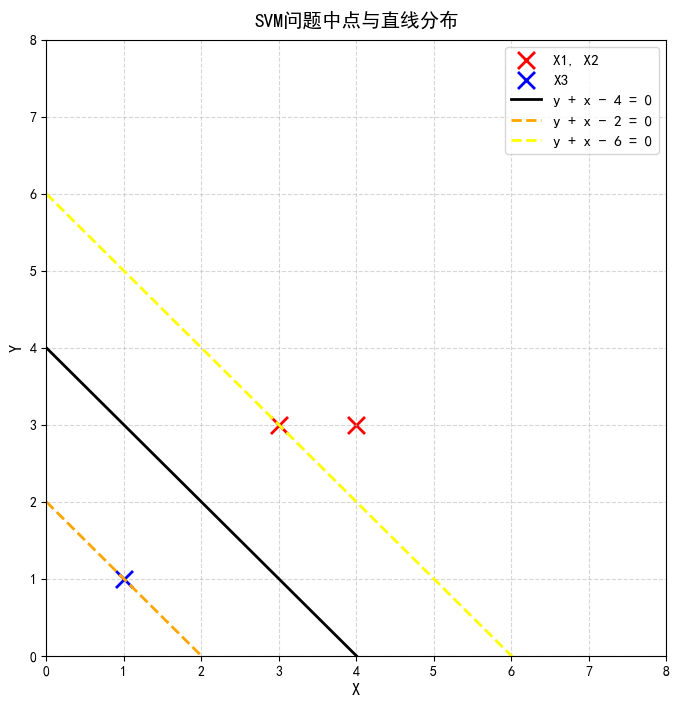

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 配置支持特殊符号的字体（优先微软雅黑，对下标符号兼容性更好）
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 确保负号正常显示

# 创建图形
plt.figure(figsize=(8, 8))

# 定义点坐标
red_points = [(3, 3), (4, 3)]  # X1和X2（红色叉）
blue_points = [(1, 1)]         # X3（蓝色叉）

# 绘制红色叉点（用X1、X2替代下标形式，避免字体兼容问题）
for x, y in red_points:
    label = 'X1, X2' if (x, y) == red_points[0] else ""
    plt.scatter(x, y, color='red', marker='x', s=150, linewidth=2, label=label)

# 绘制蓝色叉点
for x, y in blue_points:
    plt.scatter(x, y, color='blue', marker='x', s=150, linewidth=2, label='X3')

# 生成x值（覆盖[0,10]范围）
x = np.linspace(0, 8, 100)

# 绘制三条直线
plt.plot(x, -x + 4, color='black', linestyle='-', linewidth=2, label='y + x - 4 = 0')
plt.plot(x, -x + 2, color='orange', linestyle='--', linewidth=2, label='y + x - 2 = 0')
plt.plot(x, -x + 6, color='yellow', linestyle='--', linewidth=2, label='y + x - 6 = 0')

# 设置坐标轴范围
plt.xlim(0, 8)
plt.ylim(0, 8)

# 添加标签和标题
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('SVM问题中点与直线分布', fontsize=14, pad=10)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# 显示图形
plt.show()

#### 根据上述推导的结论：$min_{\lambda\ge0}L(\vec\omega,\vec\lambda,b)=\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\lambda_i\lambda_jy^{(i)}y^{(j)}(\vec{x^{(i)}})^T\cdot\vec{x^{(j)}}-\sum_{i=1}^{m}\lambda_i$且满足$\sum_{i=1}^{m}\lambda_iy^{(i)}=0$和$\lambda_i\ge0$，
#### 表格$(\vec{x^{(i)}})^T\cdot\vec{x^{(j)}}$
|$(\vec{x^{(i)}})^T\cdot\vec{x^{(j)}}$|$\vec{X^{(1)}}$|$\vec{X^{(2)}}$|$\vec{X^{(3)}}$|
|---|---|---|---|
|$\vec{X^{(1)}}$|$(3,3)^T\cdot(3,3)=18$|$(3,3)^T\cdot(4,3)=21$|$(3,3)^T\cdot(1,1)=6$|
|$\vec{X^{(2)}}$|$(4,3)^T\cdot(3,3)=21$|$(4,3)^T\cdot(4,3)=25$|$(4,3)^T\cdot(1,1)=7$|
|$\vec{X^{(3)}}$|$(1,1)^T\cdot(3,3)=6$|$(1,1)^T\cdot(4,3)=7$|$(1,1)^T\cdot(1,1)=2$|
#### 表格$y^{(i)}y^{(j)}$
|$y^{(i)} y^{(j)}$|$y^{(1)}$|$y^{(2)}$|$y^{(3)}$|
|---|---|---|---|
|$y^{(1)}$|$1\cdot1=1$|$1\cdot1=1$|$1\cdot-1=-1$|
|$y^{(2)}$|$1\cdot1=1$|$1\cdot1=1$|$1\cdot-1=1$|
|$y^{(3)}$|$-1\cdot1=-1$|$-1\cdot1=-1$|$-1\cdot-1=1$|

#### 代入计算可得：$min_{\lambda\ge0}L(\vec\omega,\vec\lambda,b)=\frac{1}{2}(18\lambda_1^2+25\lambda_2^2+2\lambda_3^2+42\lambda_1\lambda_2-12\lambda_1\lambda_3-14\lambda_2\lambda_3)-\lambda_1-\lambda_2-\lambda_3$，且满足：$\sum_{i=1}^{m}\lambda_iy^{(i)}=0$ 即 $\lambda_1+\lambda_2-\lambda_3=0$，$\lambda_3=\lambda_1+\lambda_2$化简$L(\vec\omega,\vec\lambda,b)$可得：$L(\vec\omega,\vec\lambda,b)=4\lambda_1^2+\frac{13}{2}\lambda_2^2+10\lambda_1\lambda_2-2\lambda_1-2\lambda_2$，要求拉格朗日函数的极小值，先求偏导：$\left\{\begin{matrix}\frac{\partial L(\vec\omega,\vec\lambda,b)}{\partial\lambda_1}=8\lambda_1+10\lambda_2-2=0\\\frac{\partial L(\vec\omega,\vec\lambda,b)}{\partial\lambda_2}=13\lambda_2+10\lambda_1-2=0\end{matrix}\right.$，求解这个方程组可得$\left\{\begin{matrix}\lambda_1=\frac{3}{2}\\\lambda_2=-1\end{matrix}\right.$，因为$X^{(2)}$不在硬间隔上，所以显然求解不出$\lambda_2\ge0$的解，于是令$\lambda_2=0$，因为$X^{(1)}$在硬间隔上，所以此时要必须要满足$\frac{\partial L(\vec\omega,\vec\lambda,b)}{\partial\lambda_1}=0$，代入$\lambda_2=0$，得$\lambda_1=\frac{1}{4}$，再代入$\lambda_3=\lambda_1+\lambda_2$可得：$\lambda_3=\frac{1}{4}$，此时$\vec\omega=\sum_{i=1}^{m}\lambda_iy^{(i)}\vec{x^{(i)}}=\frac{1}{4}\cdot1\cdot(3,3)^T+0+\frac{1}{4}\cdot-1\cdot(1,1)^T=(\frac{1}{2},\frac{1}{2})^T$，此时$\lambda_1>0$，$\lambda_3>0$，说明他们在硬间隔直线上，所以任意一个$\lambda$代入方程：$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=0$，假设代入$\lambda_1$，它的$y^{(1)}=1$，$\vec{x^{(1)}}=(3,3)^T$，满足方程：$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=1-1\cdot((\frac{1}{2},\frac{1}{2})\cdot(3,3)^T+b)=0$ 解方程可得$b=-2$，于是可得直线：$(\vec\omega)^T\vec{x^{(i)}}+b=\frac{1}{2}x+\frac{1}{2}y-2=0$，与原来一开始推断的黑实线：$x+y-4=0$为同一条直线，推导完成。

# 3.软间隔
### 1）软间隔的作用：允许少量样本违反分类超平面的约束，通过平衡分类间隔大小与分类错误来构建更稳健的模型。
### 2）引入软间隔：考虑一种情况，当构建好了一个SVM模型，如果新增加一些数据，要对新数据和老数据一起训练一个模型，如果说这个新加入的数据在硬间隔之上或者硬间隔之外，你们这个之前数据得出的SVM超平面不需要改变，但是如果数据点在硬间隔之内或者在分隔直线上，就比如在一开始1-1）的图片中新增一个蓝叉点，到了在他们的硬间隔之内或者到了最优的分隔线。那是否需要重新再算最大间隔？在多数情况下，是不需要的，所以引入了软间隔的概念，相当于给最小化函数：$f(\vec\omega)=\frac{||\omega||_2^2}{2}$增加了一个惩罚项$\alpha_i$（注意，每一个数据都引入惩罚项，因此最小化函数需要将所有惩罚因子求和）。
### 3）软间隔惩罚项的分析：对于$\alpha_i$的取值，观察硬间隔直线上的点，满足：$y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=1$，如果在硬间隔之内的点（软间隔点），满足：$y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=1-\alpha_i$（显然$\alpha_i\ge0$，因为当$\alpha_i=0$时，新增的数据点在硬间隔上，正常求解SVM问题即可，当数据点在硬间隔之外，同样也是正常点此时也是$\alpha_i=0$，正常求解硬间隔问题即可，但是当数据点在软间隔上，此时$\alpha_i>0$，但是对于它不能无限大下去，最大取$1-y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)$），设$y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)=A$，那么$\alpha_i=1-A$，当$A\ge1$时，$\alpha_i=0$，当$A<1$时，$\alpha_i>0$,故给出了$\alpha_i=max[0,1-A]$
### 4）惩罚因子的最小化函数：拥有惩罚项的最小化函数为：$f^{'}(\vec\omega)=\frac{||\omega||_2^2}{2}+C\cdot\sum_{i=1}^{m}\alpha_i$，约束条件变为：$y^{(i)}((\vec\omega)^T\vec{x^{(i)}}+b)+\alpha_i\ge1$（$C$为惩罚项权重，$C\ge0$），对于函数$f^{'}(\vec\omega)$，需要最小化，通过之前的分析可以得出结论需要寻找间隔最大的点，最小化$f(\vec\omega)$，当$||\omega||_2^2$越小，间隔就越大，$\sum_{i=1}^{m}\alpha_i$越小，即惩罚项作用越不明显，说明惩罚容忍度越低；反之，间隔越小，$\sum_{i=1}^{m}\alpha_i$越大，惩罚项作用越明显，说明惩罚容忍度越高。关于$C$，当$C$越大的时候，$C\cdot\sum_{i=1}^{m}\alpha_i$，$\sum_{i=1}^{m}\alpha_i$越小，惩罚项容忍度越低，当$C$接近于无穷大的时候，$\alpha_i=0$，就是普通的硬间隔问题；反之$C$越小，容忍度越高。故要找到$f^{'}(\vec\omega)$的平衡点使得得到最优解。

# 4.核函数
### 1）定义：核函数是支持向量机（SVM）中用于处理非线性数据的关键工具，本质是通过低维空间中样本的直接计算，替代其映射到高维空间后的内积运算，从而在不增加计算复杂度的前提下，实现高维空间的线性可分。
### 2）核函数的作用：在现实问题中，并不是所有的分类问题都是线性可分的，即大多数情况下，是找不到一个超平面或直线，可以完美分隔两个类别，于是就引入了核函数，它的作用是以一定的函数技巧，将数据升维，如有在$XOY$平面上，找不到一条直线分隔两个类别，那么就升高维度变成三维甚至更高，使得其变为线性可分。例如两个特征$x_1$，$x_2$构成的平面，找不到一条线分隔数据点$(x_1^{(i)},x_2^{(i)})$，将其用核函数：$k(\mathbf{x},\mathbf{y})=(\mathbf{x}+\mathbf{y})^2$，其映射函数为：$\phi(x_1,x_2)=(x_1^2,\sqrt{2}x_1x_2,x_2^2)$就是将所有数据点按照映射函数的方式升维，比如：$x_1=3$，$x_2=3$，那么将点$(3,3)$升维，变成了：$(3^2,\sqrt{2}\cdot3\cdot3,3^2)=(9,9\sqrt{2},9)$这样就实现了升维，然后就可以变成找一个平面分隔两个类。
### 3）常见核函数：
#### a.多项式核：$K(\mathbf{x}, \mathbf{y}) = (\mathbf{x} \cdot \mathbf{y} + c)^d$，映射函数为：$\phi(x_1,x_2) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2, \sqrt{2c} x_1, \sqrt{2c} x_2, c)$（设$d=2$）
#### b.径向基核：$K(\mathbf{x}, \mathbf{y}) = \exp(-\gamma |\mathbf{x} - \mathbf{y}|^2)$，映射函数为：$\phi(x_1)\phi(x_2)=\sum_{n=0}^{\infty}\frac{(-\gamma)^n}{n!}|x_1-x_2|^{2n}$
#### c.Sigmoid核:$K(\mathbf{x}, \mathbf{y}) = \tanh(\alpha \mathbf{x} \cdot \mathbf{y} + c)$，映射函数为：$\phi(x_1)\phi(x_2)=\tanh(\alpha\cdot x_1\cdot x_2+c)$